In [4]:
import os
from os.path import join

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import tensorflow as tf
import keras
from keras import layers, Input, models
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from ast import literal_eval
# print(os.listdir("../project(2)"))
import warnings
warnings.filterwarnings("ignore")

# from scipy.spatial import distance

from math import dist

In [1]:
jp = [['18', '26'],
 ['17', '26'],
 ['16', '26'],
 ['15', '26'],
 ['14', '26'],
 ['13', '26'],
 ['12', '26'],
 ['11', '26'],
 ['10', '26'],
 ['9', '26'],
 ['8', '26'],
 ['7', '26'],
 ['19', '25'],
 ['18', '25'],
 ['17', '25'],
 ['16', '25'],
 ['15', '25'],
 ['14', '25'],
 ['13', '25'],
 ['12', '25'],
 ['11', '25'],
 ['10', '25'],
 ['9', '25'],
 ['8', '25'],
 ['7', '25'],
 ['6', '25'],
 ['20', '24'],
 ['19', '24'],
 ['18', '24'],
 ['17', '24'],
 ['16', '24'],
 ['15', '24'],
 ['14', '24'],
 ['13', '24'],
 ['12', '24'],
 ['11', '24'],
 ['10', '24'],
 ['9', '24'],
 ['8', '24'],
 ['7', '24'],
 ['6', '24'],
 ['5', '24'],
 ['21', '23'],
 ['20', '23'],
 ['19', '23'],
 ['18', '23'],
 ['17', '23'],
 ['16', '23'],
 ['15', '23'],
 ['14', '23'],
 ['13', '23'],
 ['12', '23'],
 ['11', '23'],
 ['10', '23'],
 ['9', '23'],
 ['8', '23'],
 ['7', '23'],
 ['6', '23'],
 ['5', '23'],
 ['4', '23'],
 ['22', '22'],
 ['21', '22'],
 ['20', '22'],
 ['19', '22'],
 ['18', '22'],
 ['17', '22'],
 ['16', '22'],
 ['15', '22'],
 ['14', '22'],
 ['13', '22'],
 ['12', '22'],
 ['11', '22'],
 ['10', '22'],
 ['9', '22'],
 ['8', '22'],
 ['7', '22'],
 ['6', '22'],
 ['5', '22'],
 ['4', '22'],
 ['3', '22'],
 ['23', '21'],
 ['22', '21'],
 ['21', '21'],
 ['20', '21'],
 ['19', '21'],
 ['18', '21'],
 ['17', '21'],
 ['16', '21'],
 ['15', '21'],
 ['14', '21'],
 ['13', '21'],
 ['12', '21'],
 ['11', '21'],
 ['10', '21'],
 ['9', '21'],
 ['8', '21'],
 ['7', '21'],
 ['6', '21'],
 ['5', '21'],
 ['4', '21'],
 ['3', '21'],
 ['2', '21'],
 ['23', '20'],
 ['22', '20'],
 ['21', '20'],
 ['20', '20'],
 ['19', '20'],
 ['18', '20'],
 ['17', '20'],
 ['16', '20'],
 ['15', '20'],
 ['14', '20'],
 ['13', '20'],
 ['12', '20'],
 ['11', '20'],
 ['10', '20'],
 ['9', '20'],
 ['8', '20'],
 ['7', '20'],
 ['6', '20'],
 ['5', '20'],
 ['4', '20'],
 ['3', '20'],
 ['2', '20'],
 ['24', '19'],
 ['23', '19'],
 ['22', '19'],
 ['21', '19'],
 ['20', '19'],
 ['19', '19'],
 ['18', '19'],
 ['17', '19'],
 ['16', '19'],
 ['15', '19'],
 ['14', '19'],
 ['13', '19'],
 ['12', '19'],
 ['11', '19'],
 ['10', '19'],
 ['9', '19'],
 ['8', '19'],
 ['7', '19'],
 ['6', '19'],
 ['5', '19'],
 ['4', '19'],
 ['3', '19'],
 ['2', '19'],
 ['1', '19'],
 ['24', '18'],
 ['23', '18'],
 ['22', '18'],
 ['21', '18'],
 ['20', '18'],
 ['19', '18'],
 ['18', '18'],
 ['17', '18'],
 ['16', '18'],
 ['15', '18'],
 ['14', '18'],
 ['13', '18'],
 ['12', '18'],
 ['11', '18'],
 ['10', '18'],
 ['9', '18'],
 ['8', '18'],
 ['7', '18'],
 ['6', '18'],
 ['5', '18'],
 ['4', '18'],
 ['3', '18'],
 ['2', '18'],
 ['1', '18'],
 ['24', '17'],
 ['23', '17'],
 ['22', '17'],
 ['21', '17'],
 ['20', '17'],
 ['19', '17'],
 ['18', '17'],
 ['17', '17'],
 ['16', '17'],
 ['15', '17'],
 ['14', '17'],
 ['13', '17'],
 ['12', '17'],
 ['11', '17'],
 ['10', '17'],
 ['9', '17'],
 ['8', '17'],
 ['7', '17'],
 ['6', '17'],
 ['5', '17'],
 ['4', '17'],
 ['3', '17'],
 ['2', '17'],
 ['1', '17'],
 ['24', '16'],
 ['23', '16'],
 ['22', '16'],
 ['21', '16'],
 ['20', '16'],
 ['19', '16'],
 ['18', '16'],
 ['17', '16'],
 ['16', '16'],
 ['15', '16'],
 ['14', '16'],
 ['13', '16'],
 ['12', '16'],
 ['11', '16'],
 ['10', '16'],
 ['9', '16'],
 ['8', '16'],
 ['7', '16'],
 ['6', '16'],
 ['5', '16'],
 ['4', '16'],
 ['3', '16'],
 ['2', '16'],
 ['1', '16'],
 ['24', '15'],
 ['23', '15'],
 ['22', '15'],
 ['21', '15'],
 ['20', '15'],
 ['19', '15'],
 ['18', '15'],
 ['17', '15'],
 ['16', '15'],
 ['15', '15'],
 ['14', '15'],
 ['13', '15'],
 ['12', '15'],
 ['11', '15'],
 ['10', '15'],
 ['9', '15'],
 ['8', '15'],
 ['7', '15'],
 ['6', '15'],
 ['5', '15'],
 ['4', '15'],
 ['3', '15'],
 ['2', '15'],
 ['1', '15'],
 ['24', '14'],
 ['23', '14'],
 ['22', '14'],
 ['21', '14'],
 ['20', '14'],
 ['19', '14'],
 ['18', '14'],
 ['17', '14'],
 ['16', '14'],
 ['15', '14'],
 ['14', '14'],
 ['13', '14'],
 ['12', '14'],
 ['11', '14'],
 ['10', '14'],
 ['9', '14'],
 ['8', '14'],
 ['7', '14'],
 ['6', '14'],
 ['5', '14'],
 ['4', '14'],
 ['3', '14'],
 ['2', '14'],
 ['1', '14'],
 ['24', '13'],
 ['23', '13'],
 ['22', '13'],
 ['21', '13'],
 ['20', '13'],
 ['19', '13'],
 ['18', '13'],
 ['17', '13'],
 ['16', '13'],
 ['15', '13'],
 ['14', '13'],
 ['13', '13'],
 ['12', '13'],
 ['11', '13'],
 ['10', '13'],
 ['9', '13'],
 ['8', '13'],
 ['7', '13'],
 ['6', '13'],
 ['5', '13'],
 ['4', '13'],
 ['3', '13'],
 ['2', '13'],
 ['1', '13'],
 ['24', '12'],
 ['23', '12'],
 ['22', '12'],
 ['21', '12'],
 ['20', '12'],
 ['19', '12'],
 ['18', '12'],
 ['17', '12'],
 ['16', '12'],
 ['15', '12'],
 ['14', '12'],
 ['13', '12'],
 ['12', '12'],
 ['11', '12'],
 ['10', '12'],
 ['9', '12'],
 ['8', '12'],
 ['7', '12'],
 ['6', '12'],
 ['5', '12'],
 ['4', '12'],
 ['3', '12'],
 ['2', '12'],
 ['1', '12'],
 ['24', '11'],
 ['23', '11'],
 ['22', '11'],
 ['21', '11'],
 ['20', '11'],
 ['19', '11'],
 ['18', '11'],
 ['17', '11'],
 ['16', '11'],
 ['15', '11'],
 ['14', '11'],
 ['13', '11'],
 ['12', '11'],
 ['11', '11'],
 ['10', '11'],
 ['9', '11'],
 ['8', '11'],
 ['7', '11'],
 ['6', '11'],
 ['5', '11'],
 ['4', '11'],
 ['3', '11'],
 ['2', '11'],
 ['1', '11'],
 ['24', '10'],
 ['23', '10'],
 ['22', '10'],
 ['21', '10'],
 ['20', '10'],
 ['19', '10'],
 ['18', '10'],
 ['17', '10'],
 ['16', '10'],
 ['15', '10'],
 ['14', '10'],
 ['13', '10'],
 ['12', '10'],
 ['11', '10'],
 ['10', '10'],
 ['9', '10'],
 ['8', '10'],
 ['7', '10'],
 ['6', '10'],
 ['5', '10'],
 ['4', '10'],
 ['3', '10'],
 ['2', '10'],
 ['1', '10'],
 ['24', '9'],
 ['23', '9'],
 ['22', '9'],
 ['21', '9'],
 ['20', '9'],
 ['19', '9'],
 ['18', '9'],
 ['17', '9'],
 ['16', '9'],
 ['15', '9'],
 ['14', '9'],
 ['13', '9'],
 ['12', '9'],
 ['11', '9'],
 ['10', '9'],
 ['9', '9'],
 ['8', '9'],
 ['7', '9'],
 ['6', '9'],
 ['5', '9'],
 ['4', '9'],
 ['3', '9'],
 ['2', '9'],
 ['1', '9'],
 ['24', '8'],
 ['23', '8'],
 ['22', '8'],
 ['21', '8'],
 ['20', '8'],
 ['19', '8'],
 ['18', '8'],
 ['17', '8'],
 ['16', '8'],
 ['15', '8'],
 ['14', '8'],
 ['13', '8'],
 ['12', '8'],
 ['11', '8'],
 ['10', '8'],
 ['9', '8'],
 ['8', '8'],
 ['7', '8'],
 ['6', '8'],
 ['5', '8'],
 ['4', '8'],
 ['3', '8'],
 ['2', '8'],
 ['1', '8'],
 ['23', '7'],
 ['22', '7'],
 ['21', '7'],
 ['20', '7'],
 ['19', '7'],
 ['18', '7'],
 ['17', '7'],
 ['16', '7'],
 ['15', '7'],
 ['14', '7'],
 ['13', '7'],
 ['12', '7'],
 ['11', '7'],
 ['10', '7'],
 ['9', '7'],
 ['8', '7'],
 ['7', '7'],
 ['6', '7'],
 ['5', '7'],
 ['4', '7'],
 ['3', '7'],
 ['2', '7'],
 ['23', '6'],
 ['22', '6'],
 ['21', '6'],
 ['20', '6'],
 ['19', '6'],
 ['18', '6'],
 ['17', '6'],
 ['16', '6'],
 ['15', '6'],
 ['14', '6'],
 ['13', '6'],
 ['12', '6'],
 ['11', '6'],
 ['10', '6'],
 ['9', '6'],
 ['8', '6'],
 ['7', '6'],
 ['6', '6'],
 ['5', '6'],
 ['4', '6'],
 ['3', '6'],
 ['2', '6'],
 ['22', '5'],
 ['21', '5'],
 ['20', '5'],
 ['19', '5'],
 ['18', '5'],
 ['17', '5'],
 ['16', '5'],
 ['15', '5'],
 ['14', '5'],
 ['13', '5'],
 ['12', '5'],
 ['11', '5'],
 ['10', '5'],
 ['9', '5'],
 ['8', '5'],
 ['7', '5'],
 ['6', '5'],
 ['5', '5'],
 ['4', '5'],
 ['3', '5'],
 ['21', '4'],
 ['20', '4'],
 ['19', '4'],
 ['18', '4'],
 ['17', '4'],
 ['16', '4'],
 ['15', '4'],
 ['14', '4'],
 ['13', '4'],
 ['12', '4'],
 ['11', '4'],
 ['10', '4'],
 ['9', '4'],
 ['8', '4'],
 ['7', '4'],
 ['6', '4'],
 ['5', '4'],
 ['4', '4'],
 ['20', '3'],
 ['19', '3'],
 ['18', '3'],
 ['17', '3'],
 ['16', '3'],
 ['15', '3'],
 ['14', '3'],
 ['13', '3'],
 ['12', '3'],
 ['11', '3'],
 ['10', '3'],
 ['9', '3'],
 ['8', '3'],
 ['7', '3'],
 ['6', '3'],
 ['5', '3'],
 ['19', '2'],
 ['18', '2'],
 ['17', '2'],
 ['16', '2'],
 ['15', '2'],
 ['14', '2'],
 ['13', '2'],
 ['12', '2'],
 ['11', '2'],
 ['10', '2'],
 ['9', '2'],
 ['8', '2'],
 ['7', '2'],
 ['6', '2'],
 ['18', '1'],
 ['17', '1'],
 ['16', '1'],
 ['15', '1'],
 ['14', '1'],
 ['13', '1'],
 ['12', '1'],
 ['11', '1'],
 ['10', '1'],
 ['9', '1'],
 ['8', '1'],
 ['7', '1']]

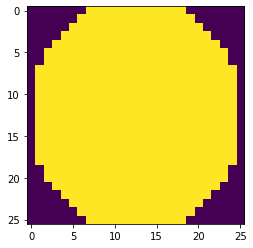

In [6]:
cnt = []
for i in range(1,27):
    temp = 0
    for num in jp:
        if int(num[1]) == i :
            temp += 1
    cnt.append(temp)   
pad = []
for i in cnt:
    temp = np.pad([1]*i, ((26-i)//2,(26-i)//2), 'constant', constant_values=0)
    pad.append(list(temp))
# nppad = np.array(pad).reshape(1,26,26)
plt.imshow(pad)

In [7]:
xy_li = pd.read_csv("xyli.csv",index_col=0, converters = {'defect':literal_eval})
scena = pd.read_table('Klarf_scenario.txt')
scena['defect'] = xy_li

In [9]:
scena.head()

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
0,AC10002SA,AC10002-01,01-01-23 04:10:00,A3D02,Metrology-Type-01,AC1,0,[]
1,AS10001T,AS10001-01,01-01-23 04:12:49,A3D01,Metrology-Type-01,AS1,0,"[(16, 15)]"
2,AS10001T,AS10001-02,01-01-23 04:38:19,A3D01,Metrology-Type-01,AS1,0,[]
3,AC10002SA,AC10002-03,01-01-23 04:41:51,A3D02,Metrology-Type-01,AC1,0,[]
4,AS10001T,AS10001-03,01-01-23 04:55:52,A3D01,Metrology-Type-01,AS1,0,[]


In [15]:
temp = scena[scena['Lot-ID'] == 'AC10002SA']
temp 

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
0,AC10002SA,AC10002-01,01-01-23 04:10:00,A3D02,Metrology-Type-01,AC1,0,[]
3,AC10002SA,AC10002-03,01-01-23 04:41:51,A3D02,Metrology-Type-01,AC1,0,[]
5,AC10002SA,AC10002-05,01-01-23 05:03:39,A3D02,Metrology-Type-01,AC1,0,"[(17, 7), (22, 21)]"
7,AC10002SA,AC10002-07,01-01-23 05:30:19,A3D02,Metrology-Type-01,AC1,0,[]
9,AC10002SA,AC10002-09,01-01-23 05:55:43,A3D02,Metrology-Type-01,AC1,0,"[(4, 18), (10, 12)]"
11,AC10002SA,AC10002-11,01-01-23 06:14:57,A3D02,Metrology-Type-01,AC1,0,[]
13,AC10002SA,AC10002-13,01-01-23 06:38:14,A3D02,Metrology-Type-01,AC1,0,[]
14,AC10002SA,AC10002-15,01-01-23 07:04:25,A3D02,Metrology-Type-01,AC1,0,"[(12, 14), (7, 18)]"
17,AC10002SA,AC10002-17,01-01-23 07:33:54,A3D02,Metrology-Type-01,AC1,0,[]
19,AC10002SA,AC10002-19,01-01-23 08:07:08,A3D02,Metrology-Type-01,AC1,0,[]


In [156]:
scena['Step-ID'].value_counts()

Metrology-Type-01    676
Metrology-type-01    168
Metrology-Type-02    106
Metrology-type-02     50
Name: Step-ID, dtype: int64

In [157]:
scena['Device-ID'].value_counts()

AS1    638
AC1    237
AC2    100
AS2     25
Name: Device-ID, dtype: int64

In [ ]:
scena[scena['Step-ID']==]

In [17]:
temp['defect'][-3:]

19                     []
20    [(13, 15), (10, 5)]
22     [(20, 18), (1, 6)]
Name: defect, dtype: object

In [28]:
scena.loc[[0]]

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
0,AC10002SA,AC10002-01,01-01-23 04:10:00,A3D02,Metrology-Type-01,AC1,0,[]


In [182]:
scena[245:255][scena[245:255]['class']==3]

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
245,AC10011TC,AC10011-07,01-03-23 07:02:23,A3D01,Metrology-Type-02,AC1,3,"[(9, 2)]"
248,AC10011TC,AC10011-08,01-03-23 07:32:41,A3D01,Metrology-Type-02,AC1,3,"[(9, 2)]"
250,AC10011TC,AC10011-09,01-03-23 08:02:44,A3D01,Metrology-Type-02,AC1,3,"[(9, 2), (9, 1)]"
252,AC10011TC,AC10011-10,01-03-23 08:30:16,A3D01,Metrology-Type-02,AC1,3,"[(8, 1), (9, 2)]"
254,AC10011TC,AC10011-11,01-03-23 08:57:50,A3D01,Metrology-Type-02,AC1,3,"[(8, 3), (7, 2)]"


In [181]:
scena[245:255]

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
245,AC10011TC,AC10011-07,01-03-23 07:02:23,A3D01,Metrology-Type-02,AC1,3,"[(9, 2)]"
246,AC20007T1,AC20007-21,01-03-23 07:11:54,A3D02,Metrology-Type-01,AC2,0,[]
247,AC20007T1,AC20007-22,01-03-23 07:30:03,A3D02,Metrology-Type-01,AC2,0,[]
248,AC10011TC,AC10011-08,01-03-23 07:32:41,A3D01,Metrology-Type-02,AC1,3,"[(9, 2)]"
249,AC20007T1,AC20007-23,01-03-23 07:52:33,A3D02,Metrology-Type-01,AC2,0,[]
250,AC10011TC,AC10011-09,01-03-23 08:02:44,A3D01,Metrology-Type-02,AC1,3,"[(9, 2), (9, 1)]"
251,AC20007T1,AC20007-24,01-03-23 08:25:17,A3D02,Metrology-Type-01,AC2,0,"[(19, 18)]"
252,AC10011TC,AC10011-10,01-03-23 08:30:16,A3D01,Metrology-Type-02,AC1,3,"[(8, 1), (9, 2)]"
253,AC20007T1,AC20007-25,01-03-23 08:44:22,A3D02,Metrology-Type-01,AC2,0,"[(16, 11)]"
254,AC10011TC,AC10011-11,01-03-23 08:57:50,A3D01,Metrology-Type-02,AC1,3,"[(8, 3), (7, 2)]"


In [183]:
df = pd.DataFrame(columns=scena.columns)
# for i in range(len(scena)):
for i in range(1000):
    print('-'*20)
    print(i,'번 wafer')
    temp_df = scena.loc[[i]]
    df = pd.concat([df,temp_df],axis=0)
    Lot_check( list(temp_df['Lot-ID'])[0] )
    Wafer_check( list(temp_df['Wafer-ID'])[0] )
    Machine_check( list(temp_df['Machine-ID'])[0] )
    Step_check( list(temp_df['Step-ID'])[0] )
    Device_check( list(temp_df['Device-ID'])[0] )

--------------------
0 번 wafer
--------------------
1 번 wafer
--------------------
2 번 wafer
--------------------
3 번 wafer
--------------------
4 번 wafer
--------------------
5 번 wafer
--------------------
6 번 wafer
--------------------
7 번 wafer
--------------------
8 번 wafer
--------------------
9 번 wafer
--------------------
10 번 wafer
--------------------
11 번 wafer
--------------------
12 번 wafer
--------------------
13 번 wafer
--------------------
14 번 wafer
--------------------
15 번 wafer
--------------------
16 번 wafer
--------------------
17 번 wafer
--------------------
18 번 wafer
--------------------
19 번 wafer
--------------------
20 번 wafer
--------------------
21 번 wafer
--------------------
22 번 wafer
--------------------
23 번 wafer
--------------------
24 번 wafer
--------------------
25 번 wafer
--------------------
26 번 wafer
--------------------
27 번 wafer
--------------------
28 번 wafer
Machine-ID error
--------------------
29 번 wafer
--------------------
30 번 wafer
M

In [159]:
def Device_check(Device_id):
    temp = df[df['Device-ID']==Device_id]

    if len(temp) < 3 :
        return 
    elif len(temp)>=3:

        de1 = list(temp['defect'])[-3]
        de2 = list(temp['defect'])[-2]
        de3 = list(temp['defect'])[-1]

        if len(de1)>0 and len(de2)>0 and len(de3)>0:
            for k in de3:
                if len( [l for l in de2 if dist(k,l) < 1.5 ] )>=1 and len( [ m for m in de1 if dist(k,m) < 1.5] )>=1:                    

                    return print('Device-ID error')
                else:  
                    return 
        else:
            return 

In [168]:
def Step_check(step_id):
    temp = df[df['Step-ID']==step_id]
    # print(temp)
    if len(temp) < 3 :
        return #print('length < 3 ')
    elif len(temp)>=3:
        # return print('length > 3 ')
        de1 = list(temp['defect'])[-3]
        de2 = list(temp['defect'])[-2]
        de3 = list(temp['defect'])[-1]
        # print(de1,de2,de3)
        if len(de1)>0 and len(de2)>0 and len(de3)>0:
            for k in de3:
                if len( [l for l in de2 if dist(k,l) < 1.5 ] )>=1 and len( [ m for m in de1 if dist(k,m) < 1.5] )>=1:                    
                    # print(de1,de2,de3)
                    # print('-'*60)
                    # print(temp)
                    return print('Step-ID error')
                else:  
                    return #print('순항중')
        else:
            return #print('순항중')

In [161]:
def Machine_check(Machine_id):
    temp = df[df['Machine-ID']==Machine_id]
    # print(temp)
    if len(temp) < 3 :
        return #print('length < 3 ')
    elif len(temp)>=3:
        # return print('length > 3 ')
        de1 = list(temp['defect'])[-3]
        de2 = list(temp['defect'])[-2]
        de3 = list(temp['defect'])[-1]
        # print(de1,de2,de3)
        if len(de1)>0 and len(de2)>0 and len(de3)>0:
            for k in de3:
                if len( [l for l in de2 if dist(k,l) < 1.5 ] )>=1 and len( [ m for m in de1 if dist(k,m) < 1.5] )>=1:                    
                    # print(de1,de2,de3)
                    # print('-'*60)
                    # print(temp)
                    return print('Machine-ID error')
                else:  
                    return #print('순항중')
        else:
            return #print('순항중')

In [146]:
def Wafer_check(wafer_id):
    temp = df[df['Wafer-ID']==wafer_id]
    # print(temp)
    if len(temp) < 3 :
        return #print('length < 3 ')
    elif len(temp)>=3:
        # return print('length > 3 ')
        de1 = list(temp['defect'])[-3]
        de2 = list(temp['defect'])[-2]
        de3 = list(temp['defect'])[-1]
        # print(de1,de2,de3)
        if len(de1)>0 and len(de2)>0 and len(de3)>0:
            for k in de3:
                if len( [l for l in de2 if dist(k,l) < 1.5 ] )>=1 and len( [ m for m in de1 if dist(k,m) < 1.5] )>=1:                    
                    # print(de1,de2,de3)
                    # print('-'*60)
                    # print(temp)
                    return print('Wafer-ID error')
                else:  
                    return #print('순항중')
        else:
            return #print('순항중')

In [147]:
def Lot_check(lot_id):
    temp = df[df['Lot-ID']==lot_id]
    # print(temp)
    if len(temp) < 3 :
        return #print('length < 3 ')
    elif len(temp)>=3:
        # return print('length > 3 ')
        de1 = list(temp['defect'])[-3]
        de2 = list(temp['defect'])[-2]
        de3 = list(temp['defect'])[-1]
        # print(de1,de2,de3)
        if len(de1)>0 and len(de2)>0 and len(de3)>0:
            for k in de3:
                if len( [l for l in de2 if dist(k,l) < 1.5 ] )>=1 and len( [ m for m in de1 if dist(k,m) < 1.5] )>=1:                    
                    # print(de1,de2,de3)
                    # print('-'*60)
                    # print(temp)
                    return print('Lot-ID error')
                else:  
                    return #print('순항중')
        else:
            return #print('순항중')

In [40]:
#n개의 de 리스트 만들기
n=3 
for li in range(1,n+1):s
    globals()["de{}".format(li)] = []

#n개의 de 리스트 만들기 값도 포함
n=3 
for li in range(1,n+1):
    globals()["de{}".format(li)] = machine1.loc[machine1.index[li],'defect']

